In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Missed Trash Pickups

In this data question you will work with service request data related to missed trash pickups from [hubNashville](https://hub.nashville.gov), Metro Nashville government's comprehensive customer service system.

Your goal is to practice working with dates, times, and time-based aggregation in pandas while exploring patterns in missed pickups. You’ll also calculate fines based on missed pickups within a rolling time window.

**Step 1: Data Preparation**
1. Convert any date columns to datetime using pd.to_datetime().  
2. Create new columns for:  
    * year, month, day
    * day_of_week (or weekday name)
3. Filter the data so that you are only analyzing actual missed pickups.

In [2]:
# show dataframe
import pandas as pd

trash_pickup = pd.read_csv('../data/trash_hauler_report_with_lat_lng.csv')
trash_pickup.head(2) 

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470


In [3]:
# change format of data values
trash_pickup['Date Opened'] = pd.to_datetime(trash_pickup['Date Opened'],
                                           format = "%m/%d/%Y")

In [4]:
# create day of the week column
trash_pickup['Day of Week'] = trash_pickup['Date Opened'].dt.day_name()
trash_pickup.head()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE,Day of Week
0,25270,2017-11-01,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292,Wednesday
1,25274,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470,Wednesday
2,25276,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923,Wednesday
3,25307,2017-11-01,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652,Wednesday
4,25312,2017-11-01,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861,Wednesday


In [5]:
trash_pickup['month'] = trash_pickup['Date Opened'].dt.month

In [6]:
trash_pickup['year'] = trash_pickup['Date Opened'].dt.year

In [7]:
trash_pickup['day'] = trash_pickup['Date Opened'].dt.day

In [8]:
trash_pickup.head(2)

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE,Day of Week,month,year,day
0,25270,2017-11-01,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292,Wednesday,11,2017,1
1,25274,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470,Wednesday,11,2017,1


In [9]:
missed = trash_pickup[trash_pickup['Request'].str.contains('Missed Pickup')]

**Step 2: Explore Time-Based Patterns**  
Answer these simpler questions first:  
1. Which day of the week has the highest number of missed pickups?

In [10]:
missed.groupby('Day of Week').size().idxmax()

'Friday'

2. Missed pickups over time:  
    * Find the total number of missed pickups by month. Plot this with a line chart.  
    

In [11]:
missed.groupby('month').size()

month
1     1171
2     1058
3     1135
4     1064
5     1140
6     1432
7     1468
8     2256
9     1117
10    1594
11     741
12     852
dtype: int64

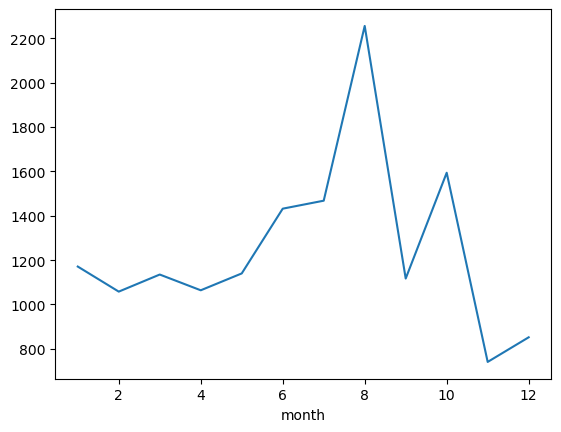

In [12]:
missed.groupby('month').size().plot(kind='line');

* Create a plot showing the number of missed pickups per day.  
    

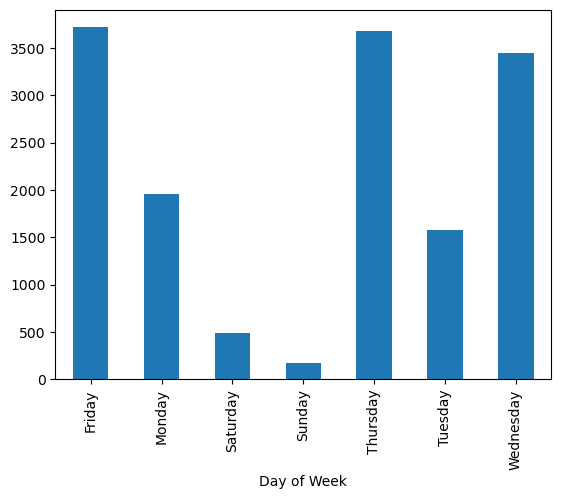

In [13]:
missed.groupby('Day of Week').size().plot(kind='bar');

* Compute a rolling 30-day average of daily missed pickups. Visualize your results with a line chart to see trends.

In [14]:
missed_per_day = missed.groupby('Date Opened').size().reset_index()
missed_per_day.columns = ['date', 'num_missed']
missed_per_day['date'] = pd.to_datetime(missed_per_day['date'])
missed_per_day.head()

,date,num_missed
0,2017-11-01,25
1,2017-11-02,29
2,2017-11-03,19
3,2017-11-05,2
4,2017-11-06,21


In [15]:
missed_per_day = missed_per_day.sort_values('date')

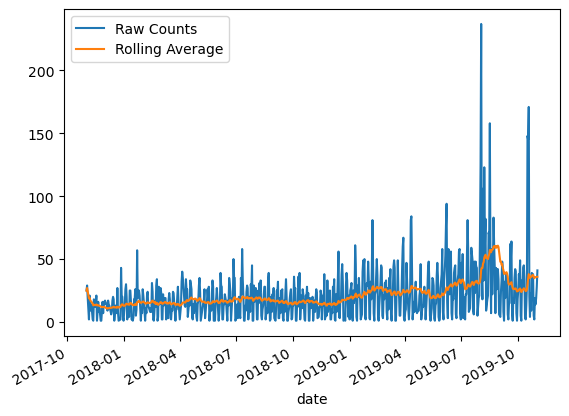

In [16]:
missed_per_day['rolling_30D'] = missed_per_day.rolling(window = '30D', on='date')['num_missed'].mean()
ax = missed_per_day.plot(x='date', y='num_missed', label= 'Raw Counts')
missed_per_day.plot(x='date', y='rolling_30D', label= 'Rolling Average', ax=ax);

**Step 3: Main Task – 180-Day Rolling Fine Calculation**  
Metro Nashville charges fines for excessive missed trash pickups. It uses the following method to calculate the total fine:  A $1500 fine is charged for each missed pickup that is the third or subsequent one at the same address within a 180-day window. Multiple fines may apply to the same address.  
What is the total fine across all addresses? **Hint:** The rolling method can be use in combination with groupby.

In [17]:
missed.head()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE,Day of Week,month,year,day
1,25274,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470,Wednesday,11,2017,1
2,25276,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923,Wednesday,11,2017,1
3,25307,2017-11-01,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652,Wednesday,11,2017,1
4,25312,2017-11-01,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861,Wednesday,11,2017,1
8,25330,2017-11-01,Trash - Curbside/Alley Missed Pickup,Missed.,4484 Lavergne Couchville Pike,37013.0,RED RIVER,4210,33.0,1794533.514,618749.3427,-86.588364,36.031728,Wednesday,11,2017,1


In [18]:
missed_table = missed.groupby(['Incident Address']).size().reset_index(name='num_missed')

In [19]:
fine_table = missed_table[missed_table['num_missed'] >= 3]

In [20]:
fine_table

,Incident Address,num_missed
32,"1000 Trevino Pl, Antioch, Tennessee, 37013",3
66,"1004 Trevino Pl, Antioch, Tennessee, 37013",3
123,"1009 14th Ave S, Nashville, TN 37212, United S...",3
135,"1009 Trevino Pl, Antioch, Tennessee, 37013",3
154,"101 Westminster Pl, Nashville, TN 37205, Unite...",4
...,...,...
11262,"927 Ilawood Dr, Nashville, TN 37211, United St...",3
11268,"927 Woods Lake Dr, Nashville, TN 37115, United...",3
11299,933 Glendale Ln B,3
11398,"Granbery Park Dr, Nashville, TN 37027, United ...",7


In [21]:
missed_by_address = missed.groupby(['Incident Address', 'Date Opened']).size().reset_index(name='num_missed')

In [22]:
missed_by_address.tail()

,Incident Address,Date Opened,num_missed
14776,"Tusculum Rd, Nashville, TN , United States",2019-08-01,1
14777,"Tusculum Rd, Nashville, TN , United States",2019-08-02,1
14778,"Westboro Dr, Nashville, TN 37209, United States",2019-08-15,1
14779,brick church pike,2018-01-11,1
14780,xavier dr,2017-12-30,1


In [23]:
miss_rolling = missed.groupby('Incident Address').rolling('180D', on='Date Opened')['Request'].count()
miss_rolling = pd.DataFrame(miss_rolling)

miss_rolling_fine = miss_rolling[miss_rolling['Request'] > 2].reset_index()
miss_rolling_fine.columns = ['address', 'date', 'num_miss_in_180d']
miss_rolling_fine.sample(5)

,address,date,num_miss_in_180d
209,"1501 Lewis Rd, Nashville, TN 37115, United States",2019-01-22,3.0
267,1701 Cedar Grove Rd,2018-05-31,6.0
897,"6016 Frontier Ln, Nashville, TN 37211, United ...",2019-10-18,3.0
57,"110 George L Davis Blvd, Nashville, TN 37203, ...",2019-09-26,11.0
567,3116 anderson rd,2018-05-04,3.0


In [24]:
total_fine = len(miss_rolling_fine) * 1500
print(f"the total fine for all missed garbage days is {total_fine}")

the total fine for all missed garbage days is 1591500


**Step 4: Bonus Questions**
* What other types of complaints are there?

In [25]:
# Display most common complaints
complaints = trash_pickup.groupby('Request').size().reset_index(name = 'Occurences')
complaints

,Request,Occurences
0,Damage to Property,257
1,Trash - Backdoor,2629
2,Trash - Curbside/Alley Missed Pickup,15028
3,Trash Collection Complaint,2312


* Are there any geospatial patterns?

Reference **"Geospatial_Analysis"** notebook for answer

* How do metro crews compare to the contractor's performance?
* How much does each trash hauler owe?
* What were the total missed pickup by route?

In [26]:
complaints = trash_pickup.groupby('Request').size().reset_index(name = 'Occurences')
complaints

,Request,Occurences
0,Damage to Property,257
1,Trash - Backdoor,2629
2,Trash - Curbside/Alley Missed Pickup,15028
3,Trash Collection Complaint,2312
